[View in Colaboratory](https://colab.research.google.com/github/VAgni/Demo/blob/master/LSTM.ipynb)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving price1.csv to price1.csv
User uploaded file "price1.csv" with length 33485 bytes


In [4]:
prices_dataset =  pd.read_csv('price1.csv', header=0)
prices_dataset

,date,symbol,open,close,low,high,volume
0,05-01-2016 00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,06-01-2016 00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,07-01-2016 00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,08-01-2016 00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,11-01-2016 00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600
5,12-01-2016 00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000
6,13-01-2016 00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600
7,14-01-2016 00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300
8,15-01-2016 00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700
9,19-01-2016 00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500


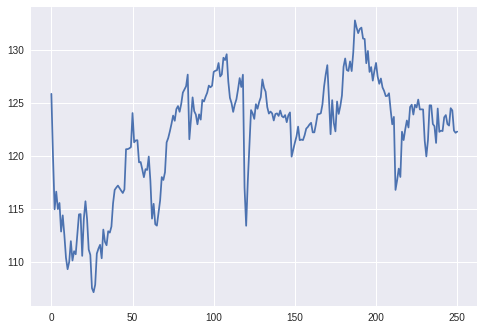

In [5]:
wltw = prices_dataset[prices_dataset['symbol']=='WLTW']
wltw.shape
wltw_stock_prices = wltw.close.values.astype('float32')

plt.plot(wltw_stock_prices)
plt.show()

wltw_stock_prices=wltw_stock_prices.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
wltw_stock_prices = scaler.fit_transform(wltw_stock_prices)

In [6]:
train_size = int(len(wltw_stock_prices) * 0.67)
test_size = len(wltw_stock_prices) - train_size
train, test = wltw_stock_prices[0:train_size,:], wltw_stock_prices[train_size:len(wltw_stock_prices),:]
print(len(train), len(test))

168 83


In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  


compilation time :  0.02518606185913086


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


In [10]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.10)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 149 samples, validate on 17 samples
Epoch 1/10
149/149 [==============================] - 2s 12ms/step - loss: 0.3053 - val_loss: 0.3217
Epoch 2/10
149/149 [==============================] - 0s 233us/step - loss: 0.2728 - val_loss: 0.2958
Epoch 3/10
149/149 [==============================] - 0s 176us/step - loss: 0.2506 - val_loss: 0.2691
Epoch 4/10
149/149 [==============================] - 0s 177us/step - loss: 0.2292 - val_loss: 0.2436
Epoch 5/10
149/149 [==============================] - 0s 172us/step - loss: 0.2060 - val_loss: 0.2179
Epoch 6/10
149/149 [==============================] - 0s 166us/step - loss: 0.1864 - val_loss: 0.1922
Epoch 7/10
149/149 [==============================] - 0s 163us/step - loss: 0.1642 - val_loss: 0.1684
Epoch 8/10
149/149 [==============================] - 0s 189us/step - loss: 0.1439 - val_loss: 0.1461
Epoch 9/10
149/149 [==============================] - 0s 193us/step - loss: 0.1259 - val_loss: 0.1235
Epoch 10/10
149/149 [=================